In [450]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Primero crearemos nuestro conjunto de datos atrificialmente. Generamos este conjunto de datos aleatorios, de manera que 50 datos sean tales que $-30<xi<30$ y con media en $0$ y otros $50$ datos que tengan la misma desviación, pero que estaran centrados lo suficientemente lejos para que el conjunto de datos sea separable. En este caso centrados en $58$.

In [451]:
#Opcion 1
x1 = np.array(np.random.normal(0,15,50))
x2 = np.random.normal(0,15,50)

x3 = np.random.normal(58,15,50)
x4 = np.random.normal(58,15,50)

y1 = np.ones(50)
y2 = np.ones(50)*(-1)

X1 = np.array([[x1],[x2],[y1]]).transpose()
X2 = np.array([[x3],[x4],[y2]]).transpose()


data_1 = np.concatenate((X1, X2) , axis = 0)
data_1 = data_1[:,0]
train, test = train_test_split(data_1, test_size=0.1)

Plotearemos los datos para verificar que el conjunto en efecto sea separable.

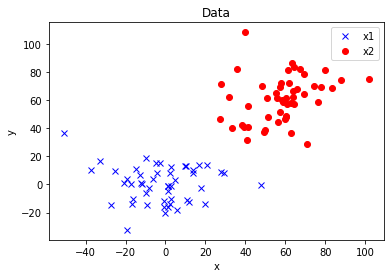

In [452]:
plt.plot(x1,x2,'x',linewidth=3,color= 'b',label = 'x1')
plt.plot(x3,x4,'o',linewidth=3,color= 'r',label = 'x2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data')
plt.show()

En el siguiente codigo programamos nuestro perceptron.

In [453]:
def perceptron2(datos):
    #Recibimos datos en forma de matrices donde la última columna deben de ser las clases (etiquetas)
    variables = datos[:, :-1] 
    clases = datos[:, -1]
    dim = variables.shape[1]
    n = len(variables)
    
    # Comenzamos todas las thetas en 0 para la primera iteración
    thetas = np.zeros(shape=(1, dim)) 
    t0 = 0 #theta cero
    
    #Definimos la Tolerancia
#     tol = 1e-10
    tol = np.finfo(float).eps
    
    condicion = True # bandera
    max_iters = 1000 #Hiperparámetro arbitrario que se puede cambiar
    j = 0 # contador de iteraciones
    cambio = 0 # contador de cambios de la recta
    
    
    while condicion: 
        tp = thetas
        for i in range(0,n) :
            x = variables[i].transpose()
            y = clases[i]

            if(np.dot(y,np.dot(thetas, x) + t0) <=0):
                thetas += np.dot(y,x)
                t0 += y
                cambio += 1
        j+= 1
#         if(abs(np.linalg.norm(thetas-tp)) >= tol):
#             print(1)
#         if(j >=max_iters):
#             print(2)
        condicion = abs(np.linalg.norm(thetas-tp)) < tol and j < max_iters

    return (thetas,t0,cambio,j)
             


In [454]:
def gen_recta(w0, w1, w2 , x, set_lenght):
    y = []
    for i in range(0, set_lenght):
        y.append(x[i]*(-w1/w2) -(w0/w2))
    return y

In [455]:
w, w0, cambio, j = perceptron2(train)

Observamos que el numero de iteraciones y los camios en la recta que realizo el algoritmo.

In [456]:
print('Cambio en la recta:', cambio)
print('Numero de iteraciones:', j)

Cambio en la recta: 312
Numero de iteraciones: 1000


Obtuvimos el siguiente resultado.

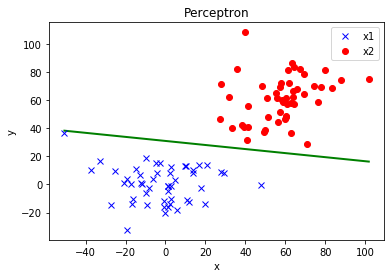

In [457]:

x = np.linspace(min(min(x1),min(x3)),max(max(x1),max(x3)),10)
y = gen_recta(w0, w[0, 0], w[0,1] , x , 10)

plt.figure()
plt.plot(x,y,'r',linewidth=2, color = 'g')
plt.plot(x1,x2,'x', color= 'b',label = 'x1')
plt.plot(x3,x4,'o', color= 'r',label = 'x2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Perceptron')
plt.show()

Ahora para ver el comportamiento del algoritmo veremos que sucede si los datos estan ordenados. 

In [458]:
w, w0, cambio , j= perceptron2(data_1)

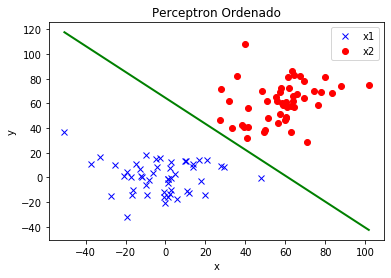

In [459]:
y = gen_recta(w0, w[0, 0], w[0,1] , x , 10)

plt.figure()
plt.plot(x,y,'r',linewidth=2, color = 'g')
plt.plot(x1,x2,'x', color= 'b',label = 'x1')
plt.plot(x3,x4,'o', color= 'r',label = 'x2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Perceptron Ordenado')
plt.show()

En esta ocacion el algoritmo realizo las siguientes iteraciones y numero de cambios en la recta.

In [460]:
print('Cambio en la recta:', cambio)
print('Numero de iteraciones:', j)

Cambio en la recta: 451
Numero de iteraciones: 1000


Para terminar de explorar el comportamiento del algoritmo, veremos que sucede con datos con menor desviacion estandar.
Es decir datos que esten en el intervalo $[-1,1]$

In [461]:
#Opcion 2
x1 = np.array(np.random.normal(-1.2,0.5,50))
x2 = np.random.normal(-1.2,0.5,50)

x3 = np.random.normal(1.2,0.5,50)
x4 = np.random.normal(1.2,0.5,50)

y1 = np.ones(50)
y2 = np.ones(50)*(-1)

X1 = np.array([[x1],[x2],[y1]]).transpose()
X2 = np.array([[x3],[x4],[y2]]).transpose()


data_2 = np.concatenate((X1, X2) , axis = 0)
data_2 = data_1[:,0]
train, test = train_test_split(data_1, test_size=0.1)

Al igual que en el ejercicio pasado, graficaremos los datos para cerciorarnos de que sea separable.

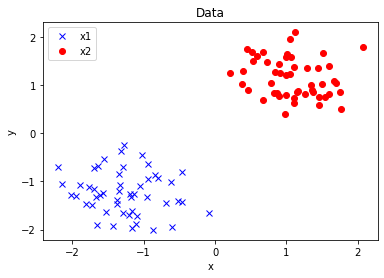

In [462]:
plt.plot(x1,x2,'x',linewidth=3,color= 'b',label = 'x1')
plt.plot(x3,x4,'o',linewidth=3,color= 'r',label = 'x2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data')
plt.show()

In [463]:
w, w0 , cambio, j = perceptron2(train)

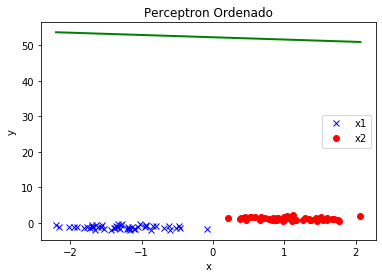

In [464]:
x = np.linspace(min(min(x1),min(x3)),max(max(x1),max(x3)),10)
y = gen_recta(w0, w[0, 0], w[0,1] , x , 10)

plt.figure()
plt.plot(x,y,'r',linewidth=2, color = 'g')
plt.plot(x1,x2,'x', color= 'b',label = 'x1')
plt.plot(x3,x4,'o', color= 'r',label = 'x2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Perceptron Ordenado')
plt.show()

Las iteraciones y el numero de cambios que se realizaron se muestra a contininuación.

In [465]:
print('Cambio en la recta:', cambio)
print('Numero de iteraciones:', j)

Cambio en la recta: 244
Numero de iteraciones: 1000


Observamos que el algoritmo nos da un resultado  lejos de ser acertado cuando los datos estan pequeños.Esto se puede deber a que con datos muy pequeños las $thetas$ crecen bastante. Por lo que habria que considerar reescalar los datos para obtener un resultado mas optimo.